In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-14')

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993
2020-04-08,267.369995,261.230011,262.739990,266.070007,42223800.0,266.070007
2020-04-09,270.070007,264.700012,268.700012,267.989990,40529100.0,267.989990


In [28]:
df.shape

(2083, 6)

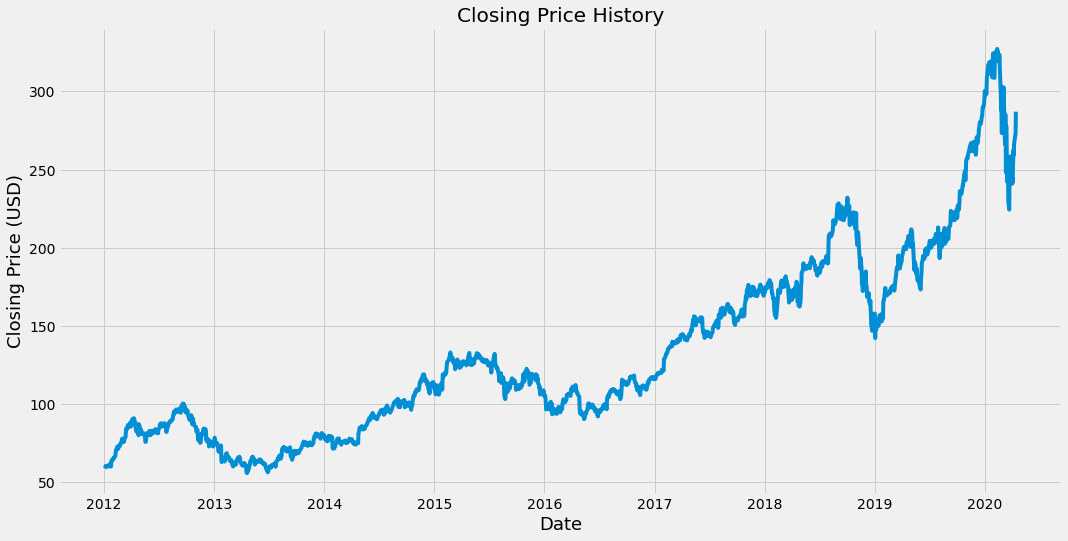

In [29]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (USD)', fontsize=18)
plt.show()

In [30]:
#  create new data frame with only the çlose column
data = df.filter(['Close'])
# convert the datadrame to a numpy array
dataset = data.values
#get the numbers of rows to train the nmodel on
training_data_len =math.ceil(len(dataset) * .8) 

training_data_len

1667

In [31]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.7818429 ],
       [0.8012232 ],
       [0.85206874]])

In [32]:
# creating training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :] 
# split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()


[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [0]:
#convert the x_train and y_train to numpy array

x_train, y_train = np.array(x_train), np.array(y_train)


In [34]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

x_train.shape

(1607, 60, 1)

In [0]:
#build the lstm model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#compile the model

model.compile(optimizer='adam', loss= 'mean_squared_error')

In [37]:
#train the model
model.fit(x_train, y_train,batch_size=1, epochs=1)

Epoch 1/1
1607/1607 [==============================] - 63s 39ms/step - loss: 5.5580e-04


In [0]:
#create the testing data set
#create a new array containing scaled values  from index 1607 to 2003
test_data = scaled_data[training_data_len - 60: , :]
# create the data stes X_tests and y_test
x_test =[]
y_test= dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  


In [0]:
#conver the data  to a numpy array
x_test = np.array(x_test)

In [0]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [44]:
# get the root mean squared error (RMSE)

rmse =np.sqrt(np.mean(predictions - y_test)**2)

rmse

2.7803630462059608

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


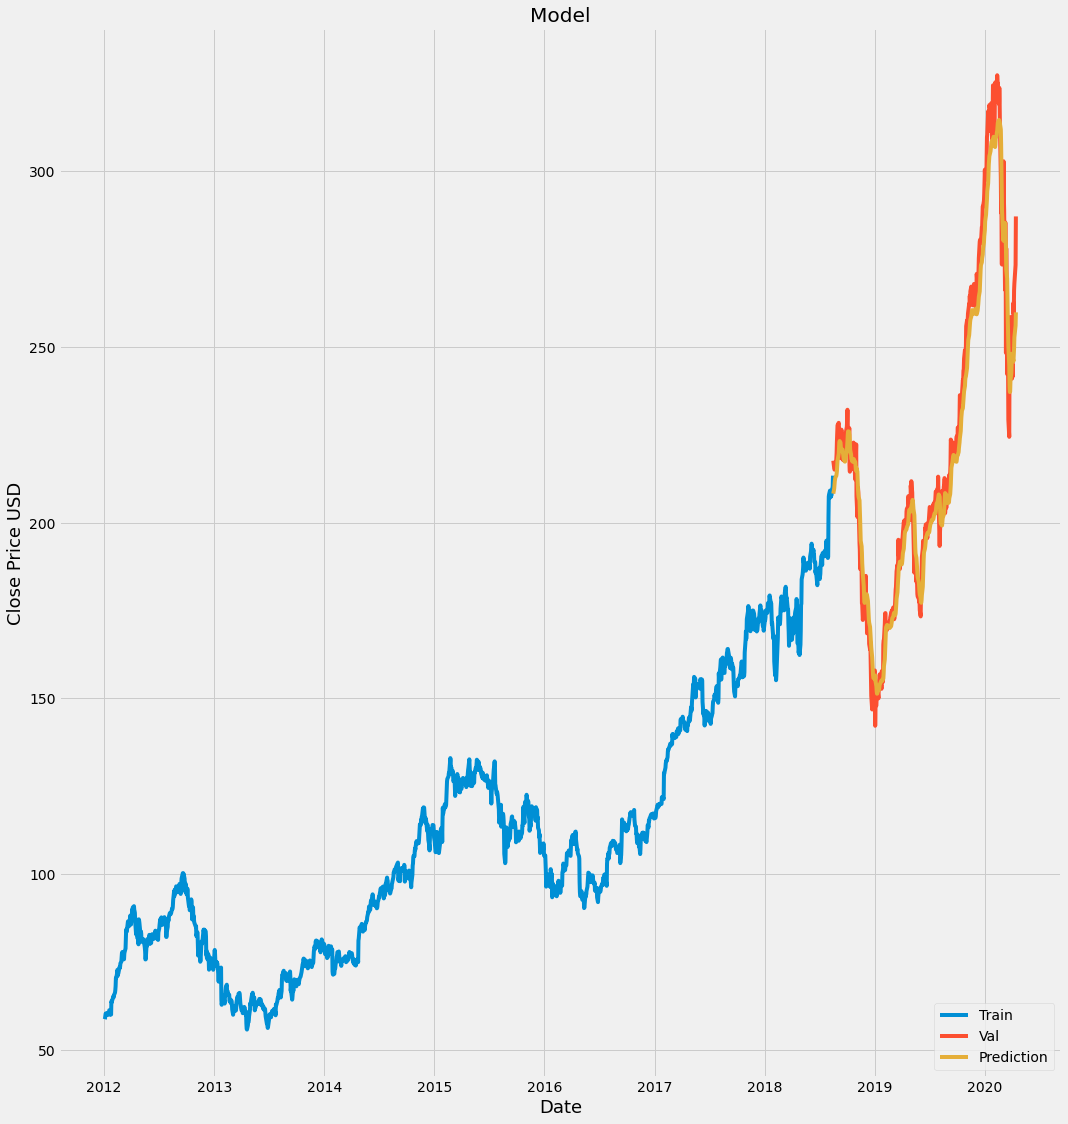

In [49]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]

valid['Predictions'] = predictions
#visualize the data

plt.figure(figsize=(16,18))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val', 'Prediction'], loc='lower right')
plt.show()

In [50]:
#show the valis and predicted prices

valid

,Close,Predictions
Date,,
2018-08-17,217.580002,208.210617
2018-08-20,215.460007,209.654343
2018-08-21,215.039993,210.892838
2018-08-22,215.050003,211.804779
2018-08-23,215.490005,212.424591
...,...,...
2020-04-07,259.429993,247.416351
2020-04-08,266.070007,249.544098
2020-04-09,267.989990,252.669006


In [53]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-4-16')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price value
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert thX_test data set to a numpy array
X_test = np.array(X_test)
#resgape the data
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price =model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[274.18304]]


In [0]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-4-16')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price value
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert thX_test data set to a numpy array
X_test = np.array(X_test)
#resgape the data
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price =model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[274.18304]]


In [0]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-4-16')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 days closing price value
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#convert thX_test data set to a numpy array
X_test = np.array(X_test)
#resgape the data
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price =model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[274.18304]]


In [54]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-4-16', end='2020-4-16')
print(apple_quote2['Close'])

Date
2020-04-16    286.690002
2020-04-16    286.690002
Name: Close, dtype: float64
